# Testing out new features

In [1]:
import os
os.chdir("..")

In [1]:
from StockBoard import StockBoard
from StockData import StockData 
# import matplotlib.pyplot as plt
# %matplotlib inline


ModuleNotFoundError: No module named 'pandasql'

In [3]:
sd = StockData('alvin369')
sd.load()

In [4]:
df = sd.getData('sell')
df

,Name,NumberOfStocks,SellingPrice,Date,TotalCost,ExtraCharges,BrokerageCost
0,IOLCP,10,700.00,2021-03-03,6992.72,0.00,7.28
1,RELIANCE,10,2035.00,2021-02-22,20329.18,0.00,20.82
2,BHARTIAIRTEL,5,605.00,2021-02-09,3021.88,0.00,3.12
3,VI,100,13.10,2021-01-18,1308.66,0.00,1.34
4,RELIANCE,10,1972.00,2021-01-18,19699.89,0.00,20.11
5,AXISBANK,15,625.00,2020-12-29,9365.39,0.00,9.61
6,BURGERKING,50,174.90,2020-12-29,8735.92,0.00,9.08
7,INFY,3,1214.00,2020-12-22,3646.15,0.00,4.15
8,LT,7,1260.00,2020-12-16,8810.85,0.00,9.15
9,DISHTV,100,15.05,2020-12-16,1503.76,0.00,1.24


In [7]:
import pandas as pd
df= pd.read_csv("./data/symbolMapping.csv")

In [11]:
df1 = df.copy(deep=True)

[{'label': '20 Microns Limited', 'value': '20MICRONS'},
 {'label': '21st Century Management Services Limited', 'value': '21STCENMGM'},
 {'label': '3i Infotech Limited', 'value': '3IINFOTECH'},
 {'label': '3M India Limited', 'value': '3MINDIA'},
 {'label': '3P Land Holdings Limited', 'value': '3PLAND'},
 {'label': '5Paisa Capital Limited', 'value': '5PAISA'},
 {'label': '63 moons technologies limited', 'value': '63MOONS'},
 {'label': 'A2Z Infra Engineering Limited', 'value': 'A2ZINFRA'},
 {'label': 'Aarti Drugs Limited', 'value': 'AARTIDRUGS'},
 {'label': 'Aarti Industries Limited', 'value': 'AARTIIND'},
 {'label': 'Aarvee Denims & Exports Limited', 'value': 'AARVEEDEN'},
 {'label': 'Aavas Financiers Limited', 'value': 'AAVAS'},
 {'label': 'Aban Offshore Limited', 'value': 'ABAN'},
 {'label': 'ABB India Limited', 'value': 'ABB'},
 {'label': 'Abbott India Limited', 'value': 'ABBOTINDIA'},
 {'label': 'Aditya Birla Capital Limited', 'value': 'ABCAPITAL'},
 {'label': 'Aditya Birla Fashion a

In [20]:
class stockInfo:
    def __init__(self):
        self.df = None
        self.path = "./data/symbolMapping.csv"
        self.load() # start data load
        
    def __repr__(self):
        return "class to give stock mapping "
    
    def load(self):
        try:
            self.df= pd.read_csv(self.path)
        except:
            raise FileNotFoundError(self.path)
            
    def getLabelValueMap(self):
        temp = self.df.copy()
        temp.rename(columns={'name':'label','symbol':'value'},inplace=True)
        return temp.to_dict('records')
        

In [21]:
s = stockInfo()

In [22]:
s.getLabelValueMap()

[{'label': '20 Microns Limited', 'value': '20MICRONS'},
 {'label': '21st Century Management Services Limited', 'value': '21STCENMGM'},
 {'label': '3i Infotech Limited', 'value': '3IINFOTECH'},
 {'label': '3M India Limited', 'value': '3MINDIA'},
 {'label': '3P Land Holdings Limited', 'value': '3PLAND'},
 {'label': '5Paisa Capital Limited', 'value': '5PAISA'},
 {'label': '63 moons technologies limited', 'value': '63MOONS'},
 {'label': 'A2Z Infra Engineering Limited', 'value': 'A2ZINFRA'},
 {'label': 'Aarti Drugs Limited', 'value': 'AARTIDRUGS'},
 {'label': 'Aarti Industries Limited', 'value': 'AARTIIND'},
 {'label': 'Aarvee Denims & Exports Limited', 'value': 'AARVEEDEN'},
 {'label': 'Aavas Financiers Limited', 'value': 'AAVAS'},
 {'label': 'Aban Offshore Limited', 'value': 'ABAN'},
 {'label': 'ABB India Limited', 'value': 'ABB'},
 {'label': 'Abbott India Limited', 'value': 'ABBOTINDIA'},
 {'label': 'Aditya Birla Capital Limited', 'value': 'ABCAPITAL'},
 {'label': 'Aditya Birla Fashion a

In [5]:
# total invested Amount
df = sd.getData('invest')
actualInvest = df[df.Description == 'add'].Amount.sum()
# actualInvest = df[df.Description == 'add'].sum()
print("actual investment",actualInvest)

actual investment 121611.34


In [6]:
def getTotalBrokerage(sd):
    """ get total brokerage used including depository participant charges """
    df_sell = sd.Sell.BrokerageCost.sum()
    df_buy = sd.Buy.BrokerageCost.sum()
    df = sd.Invest
    df_invest = -df[df.Description != 'add'].Amount.sum()
    return df_sell+df_buy+df_invest

In [7]:
getTotalBrokerage(sd)

1207.0

In [8]:
sd.Invest.Amount.sum()

120976.94

# API data extraction
- https://www.alphavantage.co/
- https://iexcloud.io/
- https://realpython.com/python-requests/
- iexcloud - using requests
    - https://medium.com/codex/pulling-stock-data-from-iex-cloud-with-python-d44f63bb82e0
- Original article
    - https://medium.com/swlh/how-to-create-a-dashboard-to-dominate-the-stock-market-using-python-and-dash-c35a12108c93

- yfinance test
    - https://analyticsindiamag.com/hands-on-guide-to-using-yfinance-api-in-python/


In [3]:
# yahoo finance test
# ! pip install yfinance
# ! pip install beautifulsoup4
# ! pip install tweepy
# ! pip install matplotlib 
# ! pip install iexfinance

# tips
- use requests as its better while switching the api providers.

- iex dosen't hold major indian stock market data
- os.environ['API_PASSWORD'] = 'secret'


In [59]:
from iexfinance.stocks import Stock
import requests,os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
https://cloud.iexapis.com/v1/stock/AAPL/chart?token=sk_beeea8f2fecf415aaf9d3390f65ad6e6

In [42]:
base_url = 'https://cloud.iexapis.com/v1'
sandbox_url = 'https://sandbox.iexapis.com/stable'

token = os.environ.get('IEX_TOKEN')
params = {'token': token}

In [47]:
resp = requests.get(base_url+'/stock/AAPL/chart', params=params)

In [60]:
df = pd.DataFrame(resp.json())

/home/alvin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

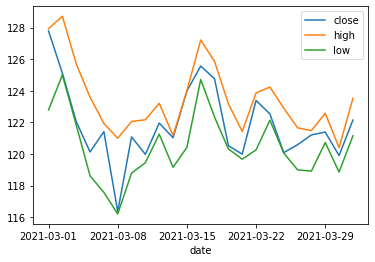

In [66]:
df.plot(y=["close",'high','low'],x='date',kind='line')

In [37]:
import os
os.environ['IEX_TOKEN']='sk_beeea8f2fecf415aaf9d3390f65ad6e6'
print(os.environ.get('IEX_TOKEN'))

sk_beeea8f2fecf415aaf9d3390f65ad6e6


In [39]:
aapl = Stock("AAPL")

{'logo_url': ''}

# ALphaVantage

In [5]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
import os
# api key 26I22QCCQXIU0DHX


In [6]:
os.environ["ALPHA_VANTAGE"] = "26I22QCCQXIU0DHX"

In [7]:
ts = TimeSeries(key=os.environ.get("ALPHA_VANTAGE"), output_format='pandas')

In [32]:
data, meta_data = ts.get_intraday(symbol='SBIN',interval='10min',outputsize='compact')

ValueError: Invalid API call. Please retry or visit the documentation (https://www.alphavantage.co/documentation/) for TIME_SERIES_INTRADAY.

In [ ]:
data

In [70]:
symb_df = pd.DataFrame(symbols.json())


,symbol,name,date,isEnabled,type,iexId
0,A,AGILENT TECHNOLOGIES INC,2021-03-31,True,N/A,2
1,AA,ALCOA CORP,2021-03-31,True,N/A,12042
2,AAA,AAF FIRST PRIORITY CLO BOND,2021-03-31,True,N/A,17195
3,AAAU,GOLDMAN SACHS PHYSICAL GOLD,2021-03-31,True,N/A,14924
4,AAC,ARES ACQUISITION CORP-A,2021-03-31,True,N/A,19180
...,...,...,...,...,...,...
10325,ICXUSDT,ICON USD,2021-03-18,True,crypto,10000013
10326,NEOUSDT,NEO USD,2021-03-18,True,crypto,10000014
10327,VENUSDT,VeChain USD,2021-03-18,True,crypto,10000015
10328,XLMUSDT,Stellar Lumens USD,2021-03-18,True,crypto,10000016


In [78]:
symb_df[symb_df.name == 'RELIANCE IND.']

,symbol,name,date,isEnabled,type,iexId


In [19]:
# mapper get value
mapper = pd.read_csv("../data/symbolMapping.csv")

# Yahoo finance - download data

In [2]:
! pip install yfinance

  Using cached yfinance-0.1.59.tar.gz (25 kB)
  Using cached multitasking-0.0.9.tar.gz (8.1 kB)
     |████████████████████████████████| 6.9 MB 182 kB/s eta 0:00:01
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=7ce388cc2d985edc49630039face2e2e7cdaa415060c60fc1ca3f7ce27c5bed9
  Stored in directory: /home/pankaj/.cache/pip/wheels/18/0f/5b/f72f0079fdb45935afdd6f56085ac84b6b823a71b3996ba76c
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=3b993b4ae0085b1e54138a15fc11be39dc0558129cc5c9c416cde2e7d3b2e37b
  Stored in directory: /home/pankaj/.cache/pip/wheels/1d/13/0b/0c32509050dcd9264e9a90b1d9d2dc9c6db9538db151ea7d26
Successfully built yfinance multitasking


In [3]:
import requests
import yfinance as yf

In [7]:
# class stockApi:
#     def __init__(self,symbol):
#         self.symbol = symbol
#         self._base_url = 'https://query1.finance.yahoo.com'
#         self._scrape_url = 'https://finance.yahoo.com/quote'
    

In [8]:
resp = requests.get("https://query1.finance.yahoo.com/v8/finance/chart/SBIN.NS")

d = resp.json()

msft.info


In [9]:
import yfinance as yf
from datetime import datetime
import os
import pandas as pd
dt_s = datetime.strptime("20000101","%Y%m%d")
# SBIN.NS
# https://towardsdatascience.com/building-dashboards-using-dash-200-lines-of-code-ae0be08d805b

In [25]:
tokens = pd.read_csv("../assets/token_symbol.csv")
stock_list = tokens.name.to_list()

In [26]:
nifty500 = pd.read_csv("../assets/ind_nifty500list.csv")

In [27]:
nifty500_symbol = nifty500.Symbol.to_list()

In [31]:
# get stock list to get data
stockDataAvailable = [i.split('.')[0] for i in os.listdir("../data/stockData/daily")]
selectedTicker = nifty500_symbol
LeftOver = set(selectedTicker) - set(stockDataAvailable)
print(f" left over stock data to retrieve \n left = {len(LeftOver)} available = {len(stockDataAvailable)}\n {LeftOver}")

 left over stock data to retrieve 
 left = 0 available = 702
 set()


In [29]:
col_map = {
    'Date':'timestamp','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'
}
def storeData(stock_name,dt_s):
    """ Enter stock name """
    exchangeSymbol = "NS" # NS
    name = stock_name.upper()+"."+exchangeSymbol
    stock = yf.Ticker(name)
    df = stock.history(start=dt_s)
    df = df.rename(columns=col_map)
    df.index.rename('timestamp',inplace=True)
    df = df[['open','high','low','close','volume']]
    
    df.to_csv(os.path.join("../data/stockData/daily",stock_name+".csv"))

In [30]:
failed = []
for i in list(LeftOver):
#     print(i)
    try:
        storeData(i,dt_s)
    except:
        failed.append(i)
print(failed)

[]


In [29]:
df = df.rename(columns=col_map,index={'ONE':'timestamp'})
df

,open,high,low,close,volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-03,28.184232,29.869350,28.184232,29.869350,28802010,0.0,0.0
2000-01-04,30.664446,32.260563,29.821885,32.260563,61320457,0.0,0.0
2000-01-05,30.456767,34.165220,30.456767,33.524399,173426953,0.0,0.0
2000-01-06,34.295750,35.684193,34.295750,34.930637,101355113,0.0,0.0
2000-01-07,35.007766,37.725321,34.770425,37.327774,128426756,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-03,1966.000000,1979.000000,1943.099976,1959.050049,10909942,0.0,0.0
2021-05-04,1950.000000,1967.800049,1911.000000,1916.599976,10083693,0.0,0.0
2021-05-05,1923.349976,1938.500000,1908.050049,1920.099976,5719649,0.0,0.0


In [30]:
df.index.rename('time',inplace=True)
df

,open,high,low,close,volume,Dividends,Stock Splits
time,,,,,,,
2000-01-03,28.184232,29.869350,28.184232,29.869350,28802010,0.0,0.0
2000-01-04,30.664446,32.260563,29.821885,32.260563,61320457,0.0,0.0
2000-01-05,30.456767,34.165220,30.456767,33.524399,173426953,0.0,0.0
2000-01-06,34.295750,35.684193,34.295750,34.930637,101355113,0.0,0.0
2000-01-07,35.007766,37.725321,34.770425,37.327774,128426756,0.0,0.0
...,...,...,...,...,...,...,...
2021-05-03,1966.000000,1979.000000,1943.099976,1959.050049,10909942,0.0,0.0
2021-05-04,1950.000000,1967.800049,1911.000000,1916.599976,10083693,0.0,0.0
2021-05-05,1923.349976,1938.500000,1908.050049,1920.099976,5719649,0.0,0.0


ADANIPORTS
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


KeyError: "None of [Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')] are in the [columns]"

In [28]:
df = pd.read_csv('../data/stockData/BPCL.csv')

In [30]:
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03,14.828063,14.828063,14.099412,14.573035,1107312,0.0,0.0
1,2000-01-04,14.573033,14.573033,13.409013,13.409013,832740,0.0,0.0


/home/alvin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Date'>

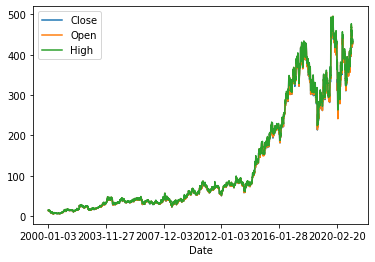

In [32]:
df.plot(x='Date',y=['Close','Open','High'])

In [ ]:
https://query1.finance.yahoo.com/v8/finance/chart/SBIN.BO